# **2nd Day - Lab-2**
---
**Lab Objective:**
> In this lab, we will figure out import Cleverhans to run adversarial attacks against CNN network. In addition, some adversarial attacks will be implemented. Finally, we will evaluate the transferability of  adversarial examples from model A to model B.
---
# **PART-1:**

In this part we will load MNIST dataset and train a CNN model with it. Then, we will run FGSM attack again the trained model. Similarly, we will implement PGD attack against the model.

---

# Part1-Step1 : **Import required libaries and MNIST dataset**

In [ ]:
!pip install -q tensorflow==2.0.0b1
# Install bleeding edge version of cleverhans
!pip install git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans
import cleverhans
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Part1-Step2 : 

In this step, a simple CNN network is created and trained with MNIST dataset.

In [ ]:
num_classes = 10
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation(tf.nn.softmax) # We seperate the activation layer to be able to access the logits of the previous layer later
])
model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy',  metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Part1-Step3 : 
---
In this step, we select a random image and using "fast_gradient_method", we convert in to an adversarial example. Then, we show original and adversarial example as well as the output of model for adversarial example (which is expected to be incorrect).

In [ ]:
# Import the attack
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method
random_index = 7204 #a random index to select sample and make it as adversarial example
original_image = test_images[random_index]
original_image = tf.convert_to_tensor(original_image.reshape((1,28,28))) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor
original_label=(test_labels[random_index])


logits_model = tf.keras.Model(model.input,model.layers[-1].output) #The attack requires the model to ouput the logits . Logit is last layer of CNN model 
epsilon = 0.1 #a parameter to control the size of modification (purturbation) on original image to convert it to adversarial example.
adv_example= fast_gradient_method(logits_model, original_image, epsilon, np.inf, targeted=False)
adv_example_label = model.predict(adv_example) #Here the adversarial example is generated
print('>> Adversarial Example is Created for images ', random_index)

# Here, we visulize original and adversarial example
plt.figure()
plt.imshow(np.reshape(original_image, (28,28)))
plt.title("Original Image Label: {}".format(original_label))
plt.show()
plt.imshow(np.reshape(adv_example, (28,28)))
plt.title("Adversarial Image, Model Prediction: {}".format(np.argmax(adv_example_label)))
plt.show()

# Part1-Step4: 

---

In this part, similat to FGSM, run PGD (projected_gradient_descent()) attack against the CNN model.


Tip1: similar to "fast_gradient_method",  import and run "projected_gradient_descent" from Cleverhans

Tip2: set following parameter values for PGD attack


> eps=0.1, norm=np.inf,nb_iter=1000,eps_iter=.01






>> Adversarial Example is Created for images  5469


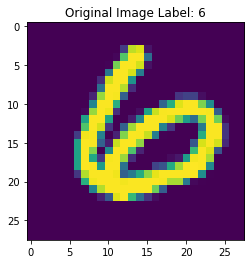

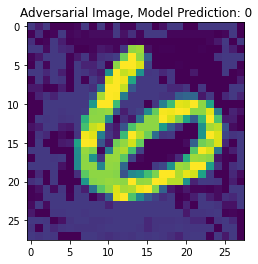

In [65]:
#Write your code here
from cleverhans.tf2.attacks.projected_gradient_descent import projected_gradient_descent
random_index = 5469 #a random index to select sample and make it as adversarial example
original_image = test_images[random_index]
original_image = tf.convert_to_tensor(original_image.reshape((1,28,28))) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor
original_label=(test_labels[random_index])


logits_model = tf.keras.Model(model.input,model.layers[-1].output) #The attack requires the model to ouput the logits . Logit is last layer of CNN model 

epsilon = 0.1
adv_example= projected_gradient_descent(logits_model, original_image, eps=epsilon, norm=np.inf,nb_iter=1000,eps_iter=.01)
adv_example_label = model.predict(adv_example) #Here the adversarial example is generated
print('>> Adversarial Example is Created for images ', random_index)
plt.figure()
plt.imshow(np.reshape(original_image, (28,28)))
plt.title("Original Image Label: {}".format(original_label))
plt.show()
plt.imshow(np.reshape(adv_example, (28,28)))
plt.title("Adversarial Image, Model Prediction: {}".format(np.argmax(adv_example_label)))
plt.show()